In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#### READ DATASET

In [4]:
data = pd.read_csv('Mobile_data.csv')
data

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [5]:
data.shape

(2000, 15)

In [6]:
data.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [9]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [10]:
for i in data.columns:
    print(f'Feature: {i} | Count of unique values: {data[i].nunique()}')
    

Feature: battery_power | Count of unique values: 1094
Feature: clock_speed | Count of unique values: 26
Feature: fc | Count of unique values: 20
Feature: int_memory | Count of unique values: 63
Feature: m_dep | Count of unique values: 10
Feature: mobile_wt | Count of unique values: 121
Feature: n_cores | Count of unique values: 8
Feature: pc | Count of unique values: 21
Feature: px_height | Count of unique values: 1137
Feature: px_width | Count of unique values: 1109
Feature: ram | Count of unique values: 1562
Feature: sc_h | Count of unique values: 15
Feature: sc_w | Count of unique values: 19
Feature: talk_time | Count of unique values: 19
Feature: price_range | Count of unique values: 4


In [11]:
a = data.describe().T
a = a.loc[:,['min' , 'max' , 'std' , 'mean']]
a

,min,max,std,mean
battery_power,501.0,1998.0,439.418206,1238.51850
clock_speed,0.5,3.0,0.816004,1.52225
fc,0.0,19.0,4.341444,4.30950
int_memory,2.0,64.0,18.145715,32.04650
m_dep,0.1,1.0,0.288416,0.50175
mobile_wt,80.0,200.0,35.399655,140.24900
n_cores,1.0,8.0,2.287837,4.52050
pc,0.0,20.0,6.064315,9.91650
px_height,0.0,1960.0,443.780811,645.10800
px_width,500.0,1998.0,432.199447,1251.51550


In [12]:
data.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [13]:
print(data[data['pc'] == 0].shape)
print(data[data['sc_w'] == 0].shape)
print(data[data['px_height'] == 0].shape)

(101, 15)
(180, 15)
(2, 15)


In [14]:
a1 = data[['pc' , 'fc']] [data['pc']==0]
a1

,pc,fc
7,0,0
33,0,0
52,0,0
54,0,0
62,0,0
...,...,...
1906,0,0
1911,0,0
1931,0,0
1968,0,0


In [15]:
a1['check'] = np.where(a1['pc'] == a1['fc'] , 'yes' , 'no')
a1['check'].value_counts()

yes    101
Name: check, dtype: int64

In [16]:
df = data.copy()

In [17]:
df['sc_w'] = df['sc_w'].replace(0,5.0)
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [18]:
print(df[df['sc_w'] == 0].shape)

(0, 15)


In [20]:
a2 = df[['px_height','px_width']][df['px_height']==0]
print(a2.index)
a2

Int64Index([1481, 1933], dtype='int64')


,px_height,px_width
1481,0,1987
1933,0,994


In [21]:
df.drop(a2.index,inplace=True)
df.shape

(1998, 15)

### EDA

In [23]:
def eda(dt , feat):
    
    plt.figure(figsize=(9,3))
    plt.subplot(1,2,1)
    sns.distplot(x=data[feat])
    plt.title(f'Distplot for {feat}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=data[feat])
    plt.title(f'Boxplot for {feat}')
    
    plt.show()

In [24]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

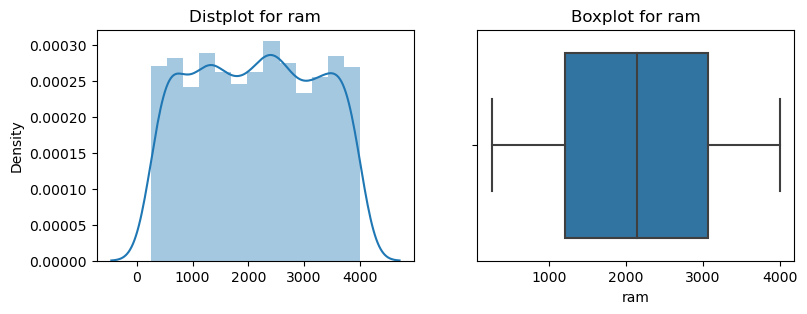

In [25]:
eda(df,'ram')

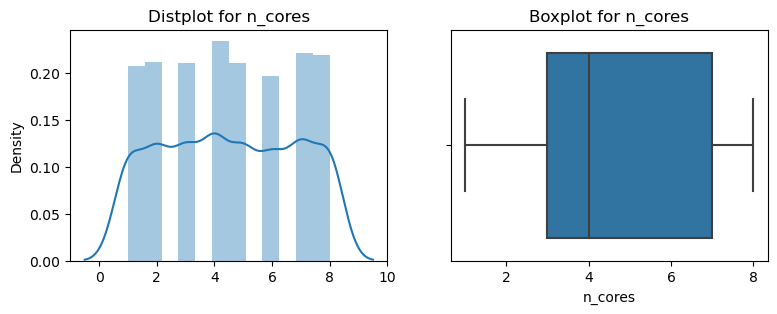

In [26]:
eda(df,'n_cores')

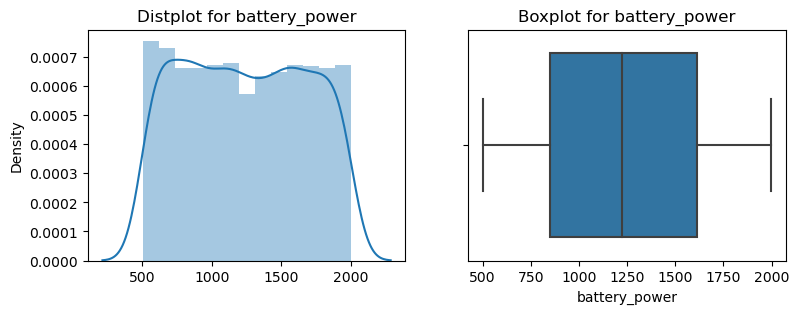

In [27]:
eda(df,'battery_power')

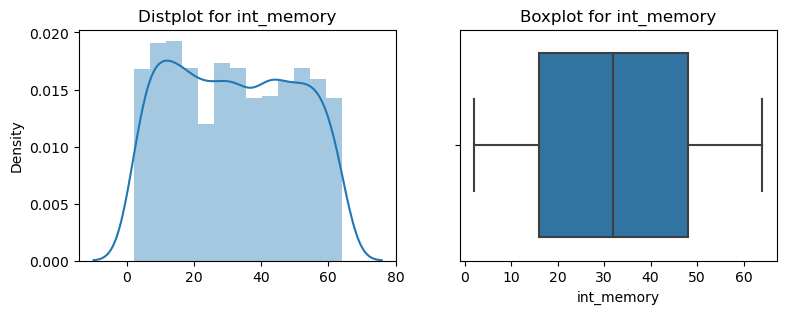

In [28]:
eda(df,'int_memory')

### Outlier Treatment

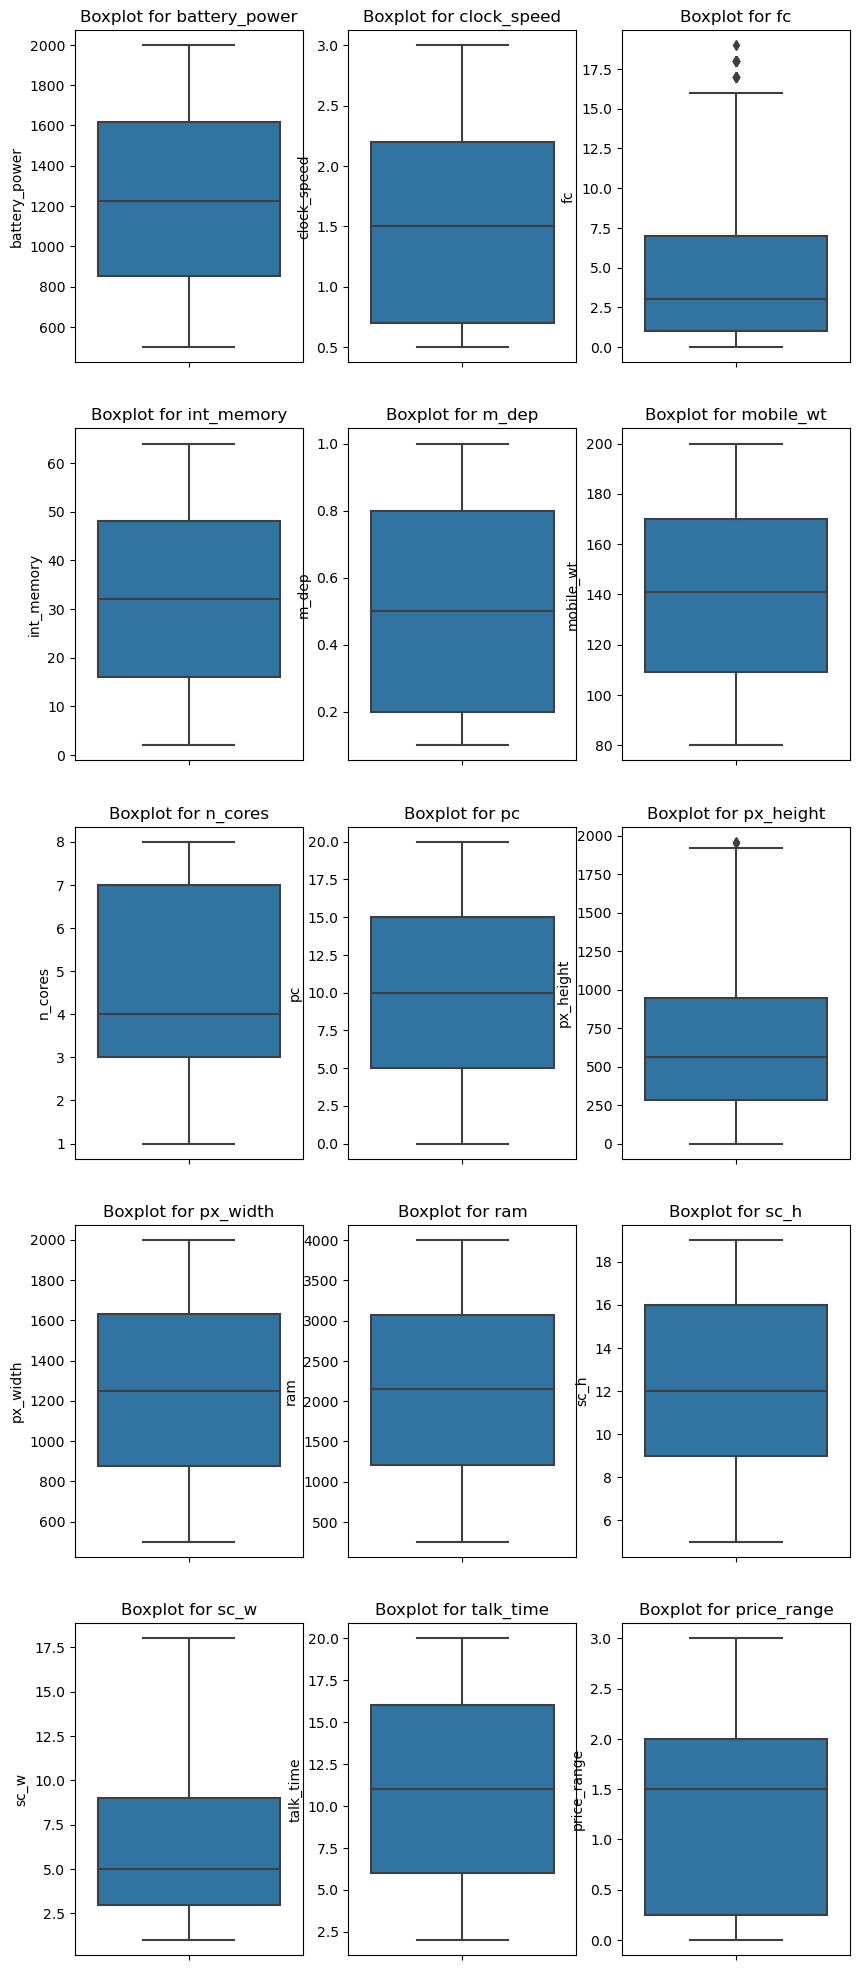

In [29]:
cols = df.columns
plt.figure(figsize=(10,25))

for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    sns.boxplot(y = df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

In [30]:
df[['fc','px_height']].describe(percentiles=[0.95,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,97%,98%,99%,max
fc,1998.0,4.308809,4.343101,0.0,3.0,13.00,15.00,16.0,16.00,19.0
px_height,1998.0,645.753754,443.532906,1.0,565.5,1485.15,1618.09,1698.0,1791.03,1960.0


In [31]:
print(df[df['fc']>16].shape)
print(df[df['px_height']>1791.03].shape)

(18, 15)
(20, 15)


In [32]:
df['fc'] = np.where(df['fc']>16,16,df['fc'])
df['px_height'] = np.where(df['px_height']>1791.03,1791.03,df['px_height'])

In [33]:
print(df[df['fc']>16].shape)
print(df[df['px_height']>1791.03].shape)

(0, 15)
(0, 15)


### Correlation

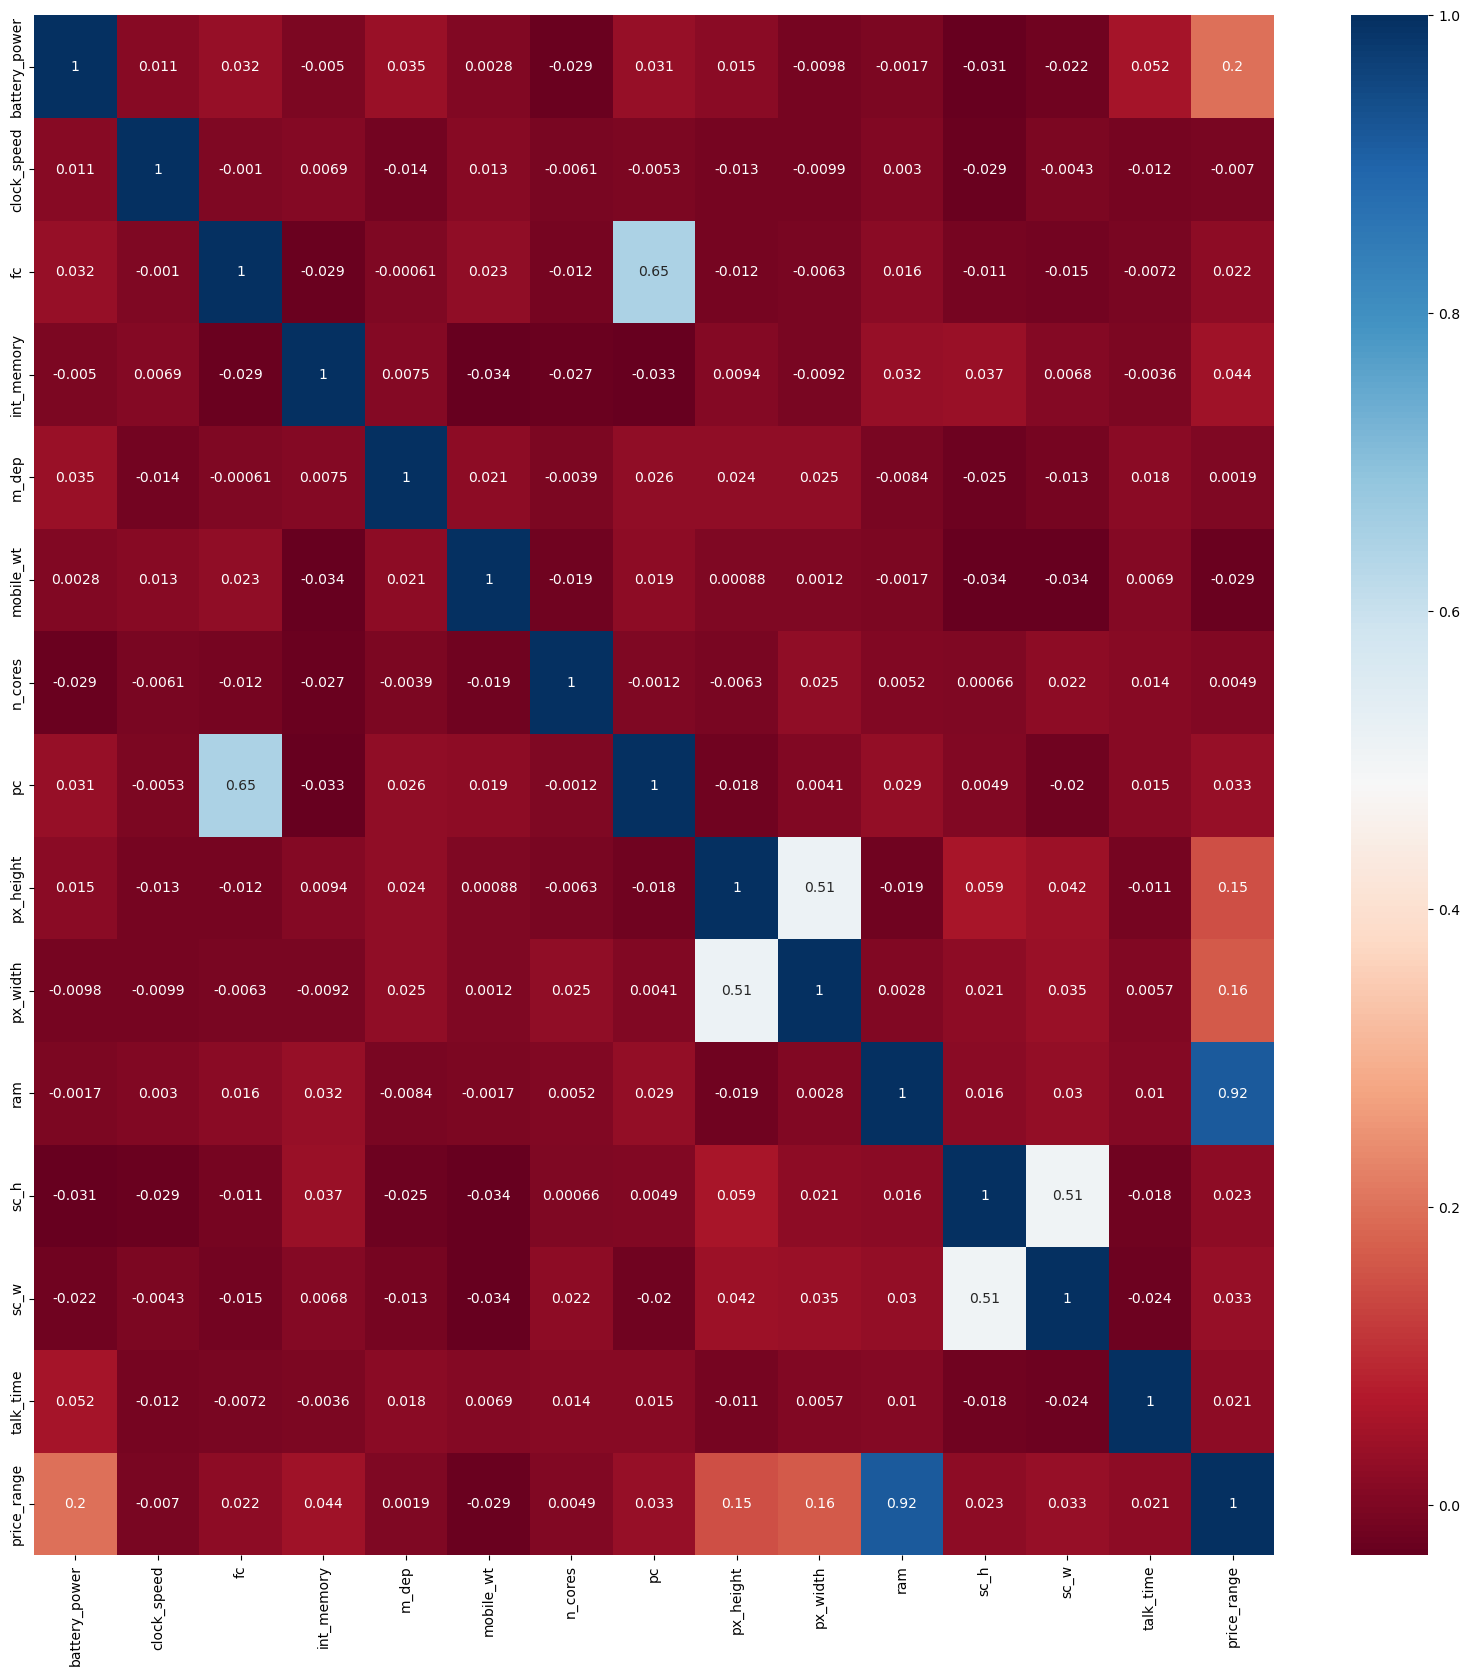

In [34]:
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

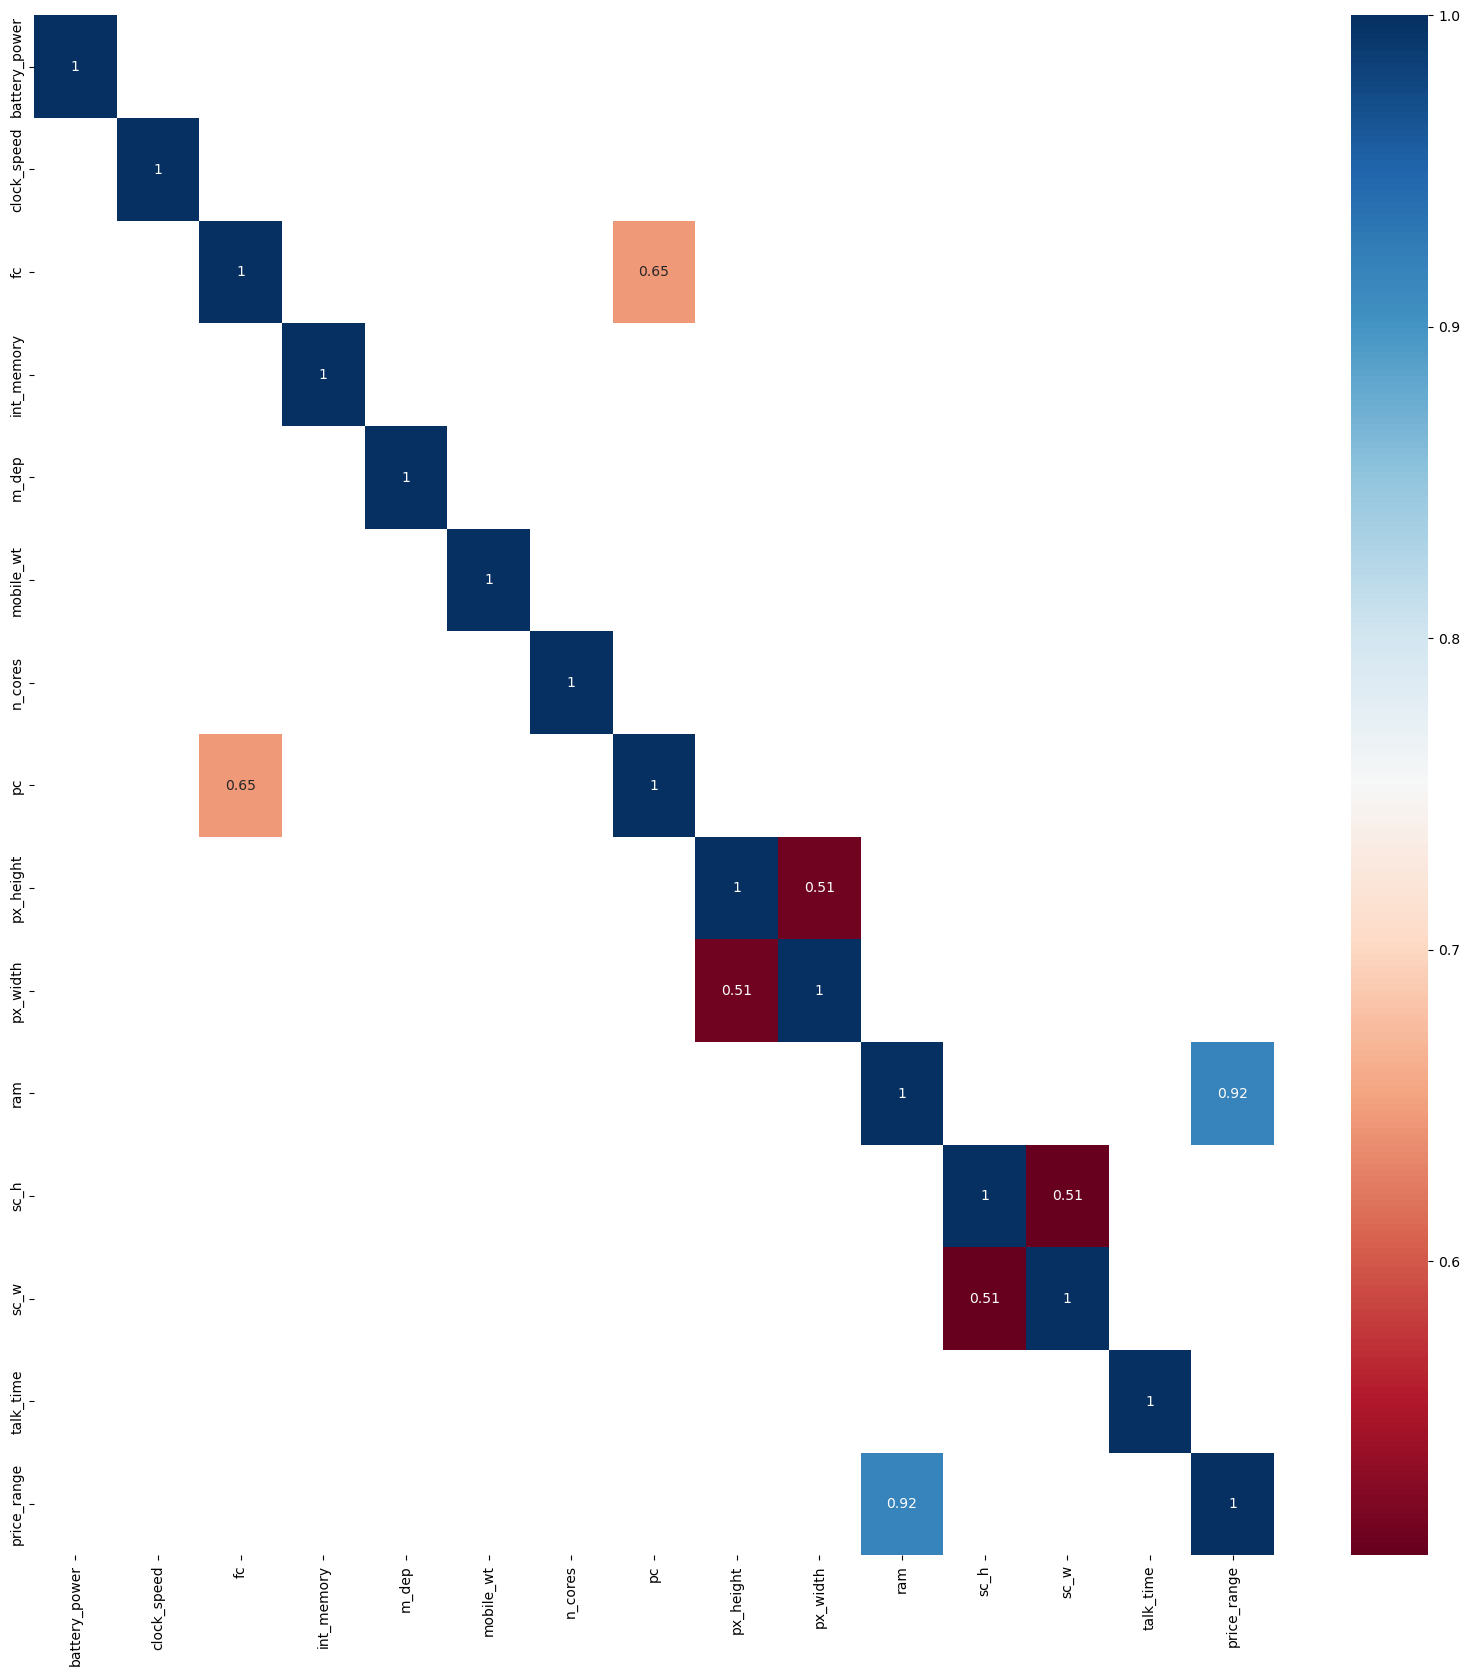

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.5],annot=True,cmap='RdBu')
plt.show()

### Select x and y

In [36]:
x = df.drop('price_range',axis=1)
y = df['price_range']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Split data into train and test

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1398, 14)
(600, 14)
(1398,)
(600,)


### Standardization

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
print(x_train_sc.shape)
print(x_test_sc.shape)
print(type(x_train_sc))

(1398, 14)
(600, 14)
<class 'numpy.ndarray'>


In [41]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [43]:
def eval_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    
    print(classification_report(y_test,ypred))

### KNN Classification

In [44]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [45]:
knn = KNeighborsClassifier(n_neighbors = 11)
eval_model(knn,x_train,x_test,y_train,y_test)

Training score 0.9413447782546495
Testing score 0.9333333333333333
Predictions [0 0 0 3 3 3 1 1 3 2 0 0 2 0 0 1 2 3 2 3 2 1 3 1 3 1 1 1 2 0 0 2 3 3 1 3 0
 1 3 0 2 1 3 0 2 2 1 0 3 0 3 3 2 2 3 0 2 1 1 2 0 3 0 1 0 3 2 3 1 1 0 1 0 3
 2 2 2 0 2 0 3 1 3 3 1 3 3 1 2 3 1 1 1 2 1 3 1 2 3 3 3 0 2 1 3 1 3 0 3 2 2
 3 0 1 2 0 3 3 0 0 3 2 2 2 0 0 3 3 0 1 3 2 1 1 3 2 3 0 2 2 0 1 1 2 2 3 1 3
 0 2 2 2 3 2 1 2 0 0 0 2 1 0 3 2 0 0 0 2 2 1 3 2 3 0 1 0 1 2 1 2 1 0 2 1 0
 0 0 0 1 0 0 0 3 2 2 0 3 2 2 3 2 2 2 0 1 1 2 0 3 2 0 1 1 0 1 2 2 2 3 2 0 3
 2 1 3 3 3 3 2 0 3 2 1 2 1 0 2 2 3 1 3 2 1 3 2 2 0 0 1 1 2 0 1 3 0 1 2 0 0
 3 0 2 3 1 0 1 0 1 1 3 1 0 2 0 0 1 3 2 1 2 1 0 0 3 2 1 0 3 0 0 2 2 0 2 1 1
 1 1 1 3 0 2 0 1 3 3 2 3 3 2 1 0 0 3 3 1 0 3 2 0 2 3 3 0 3 2 0 2 2 0 2 3 3
 3 0 2 0 2 2 1 3 2 3 1 1 3 1 0 3 2 0 1 2 3 0 2 1 3 1 3 1 1 2 3 2 2 3 0 2 2
 1 3 1 2 0 3 3 3 1 1 1 1 1 1 2 3 2 1 0 3 2 3 1 3 3 3 0 1 3 0 3 0 0 2 2 3 0
 0 1 1 2 0 0 2 1 3 2 1 2 1 1 2 3 0 3 1 3 3 1 0 1 1 1 1 0 1 3 1 0 3 3 3 3 2
 2 0 3 2 0 3 2 0 3 0 

### Determine best value for K

In [47]:
test_acc = []

for i in range(3,45,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    
    ypred_knn = model.predict(x_test)
    test_acc.append(model.score(x_test,y_test))

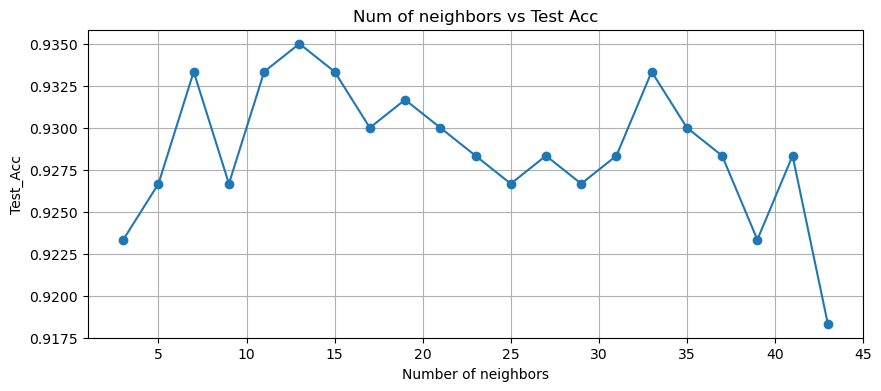

In [48]:
plt.figure(figsize=(10,4))
plt.plot(list(range(3,45,2)),test_acc,marker='o')

plt.title('Num of neighbors vs Test Acc')
plt.xlabel('Number of neighbors')
plt.ylabel('Test_Acc')

plt.grid()
plt.show()

In [49]:
print(max(test_acc))

0.935


In [50]:
test_acc.index(max(test_acc))

5

In [51]:
r = list(range(3,45,2))
print(r)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43]


### Best  K - 13

In [52]:
knn13 = KNeighborsClassifier(13)
eval_model(knn13,x_train,x_test,y_train,y_test)

Training score 0.9399141630901288
Testing score 0.935
Predictions [0 0 0 3 3 3 1 1 3 2 0 0 2 0 0 1 2 3 2 3 2 1 3 1 3 1 1 1 2 0 0 1 3 3 1 3 0
 1 3 0 2 1 3 0 2 2 1 0 3 0 3 3 2 2 3 0 2 1 1 2 0 3 0 1 0 3 2 3 1 1 0 1 0 3
 2 2 2 0 2 0 3 1 3 3 2 3 3 1 2 3 1 1 1 2 1 3 1 2 3 3 3 0 2 1 3 1 3 0 3 2 2
 3 0 1 2 0 3 3 0 0 3 2 2 2 0 0 3 3 0 1 3 2 1 1 3 2 3 0 2 2 0 1 1 2 2 3 1 3
 0 2 2 3 3 2 1 2 0 0 0 2 1 0 3 2 0 0 0 2 2 1 3 2 3 0 1 0 1 2 1 2 1 0 2 1 0
 0 0 0 1 0 0 0 3 2 2 0 2 2 2 3 2 2 2 1 1 1 2 0 3 2 0 1 1 0 1 2 2 2 3 2 0 3
 1 1 3 3 3 3 2 0 3 2 1 2 1 0 2 2 3 1 3 2 1 3 2 2 0 0 1 1 2 0 1 3 0 1 2 0 0
 3 0 2 3 1 0 1 0 1 0 3 1 0 2 0 0 1 3 2 1 2 1 0 0 3 2 1 0 3 0 0 2 2 0 2 1 1
 1 1 1 3 0 2 0 1 3 3 2 3 3 2 1 0 0 3 3 1 0 3 2 0 2 3 3 0 3 2 0 2 2 0 2 3 3
 3 0 2 0 2 2 1 3 2 3 1 1 3 1 0 3 2 0 1 2 3 0 2 1 3 1 3 1 1 2 3 2 2 3 0 2 2
 1 3 1 2 0 3 3 3 1 1 1 1 1 1 2 3 2 1 0 3 2 3 1 3 3 3 0 1 3 0 3 0 0 2 2 3 0
 0 1 1 2 0 0 2 1 3 2 1 2 1 1 2 3 0 3 1 3 3 1 0 1 1 1 1 0 1 3 1 1 3 3 3 3 2
 3 0 3 2 0 2 2 0 3 0 2 0 1 3 1 0 1

In [55]:
pd.crosstab(y_test,  ypred, rownames=['True'], colnames=['Predicted'], margins=True)

NameError: name 'ypred' is not defined